### 評価指標の類を確率分布で理解

In [5]:
import numpy as np
import pandas as pd

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

from scipy.stats import norm

### 超基本的な状況

正規分布2つ。比較的比較的分離可能な状況。均等的なデータ。

In [6]:
gaussN=norm(loc=-1)
gaussP=norm(loc=1)
def p_y_given_x(x,pi):
    return pi*gaussP.pdf(x)/((1-pi)*gaussN.pdf(x)+pi*gaussP.pdf(x))

In [7]:
def show_px(pi:float):
    x=np.linspace(-3.5,3.5)
    plt.plot(x, (1-pi)*gaussN.pdf(x), c='C0')
    plt.plot(x, pi*gaussP.pdf(x), c='C1')
    plt.plot(x, (1-pi)*gaussN.pdf(x)+pi*gaussP.pdf(x), c='C2')
#     plt.plot(x,p_y_given_x(x,pi), c='gray')
    plt.ylim(-0.01,0.5)
#     plt.show()

In [44]:
def conf_mat(thre:float, pi:float):
    TP=pi*(gaussP.cdf(1e10)-gaussP.cdf(thre))
    TN=(1-pi)*(gaussN.cdf(thre)-gaussN.cdf(-1e10))
    FP=(1-pi)*(gaussN.cdf(1e10)-gaussN.cdf(thre))
    FN=pi*(gaussP.cdf(thre)-gaussP.cdf(-1e10))
    return TP,TN,FP,FN

def print_metrics(TP,TN,FP,FN):
    acc=(TP+TN)/(TP+TN+FP+FN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=TP/(TP+0.5*(FN+FP))
#     print(f1,2/(1/recall + 1/precision))
    print(f'TP:{TP:.4f} FP:{FP:.4f} \nFN:{FN:.4f} TN:{TN:.4f} ')
    print(f'正解率:\t\t{acc:.4f}')
    print(f'Recall:\t\t{recall:.4f}')
    print(f'Precision:\t{precision:.4f}')
    print(f'F1 score:\t{f1:.4f}')

def show_result(thre:float, pi:float):
    show_px(pi)
    plt.vlines(thre,0,1,color='gray',linestyles='--')
    print_metrics(*conf_mat(thre,pi))

TP:0.4207 FP:0.0793 
FN:0.0793 TN:0.4207 
正解率:		0.8413
Recall:		0.8413
Precision:	0.8413
F1 score:	0.8413


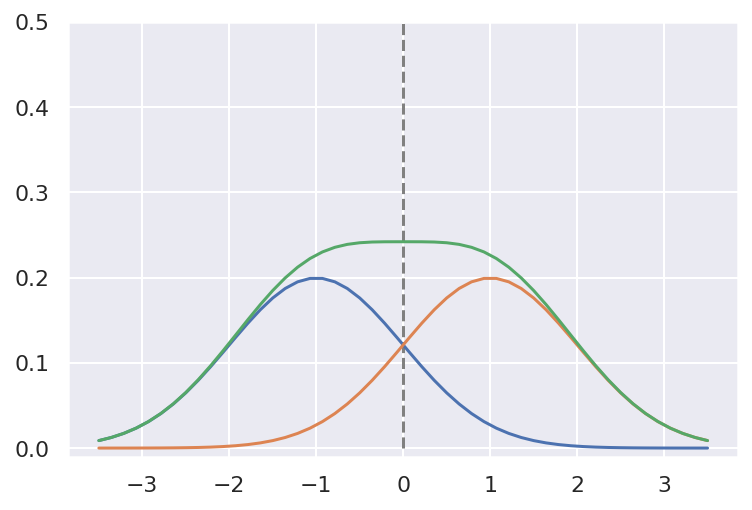

In [45]:
show_result(0,0.5)

TP:0.3941 FP:0.0575 
FN:0.1059 TN:0.4425 
正解率:		0.8365
Recall:		0.7881
Precision:	0.8726
F1 score:	0.8282


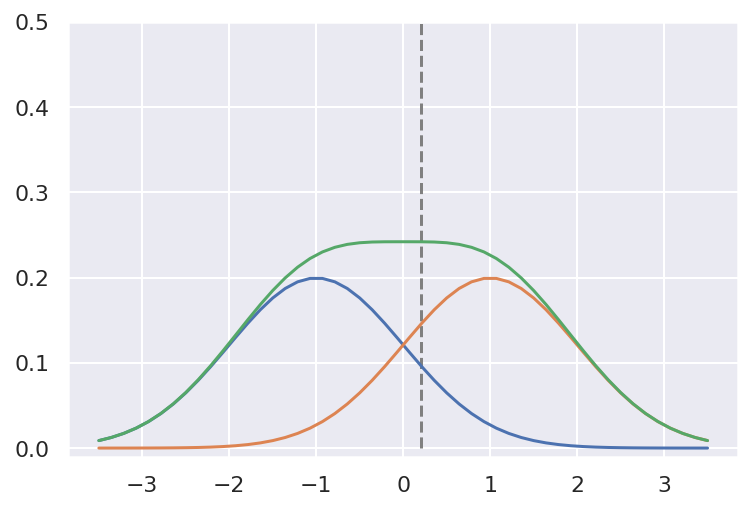

In [46]:
show_result(0.2,0.5)

TP:0.2500 FP:0.0114 
FN:0.2500 TN:0.4886 
正解率:		0.7386
Recall:		0.5000
Precision:	0.9565
F1 score:	0.6567


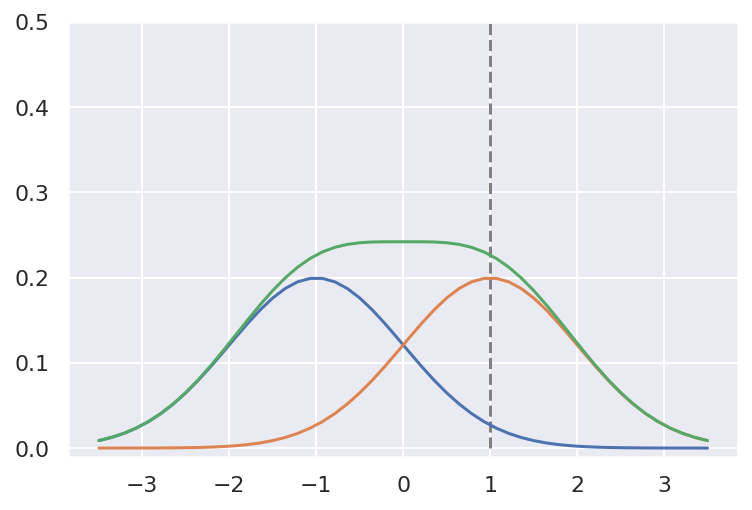

In [47]:
show_result(1,0.5)

TP:0.0114 FP:0.0000 
FN:0.4886 TN:0.5000 
正解率:		0.5114
Recall:		0.0228
Precision:	0.9986
F1 score:	0.0445


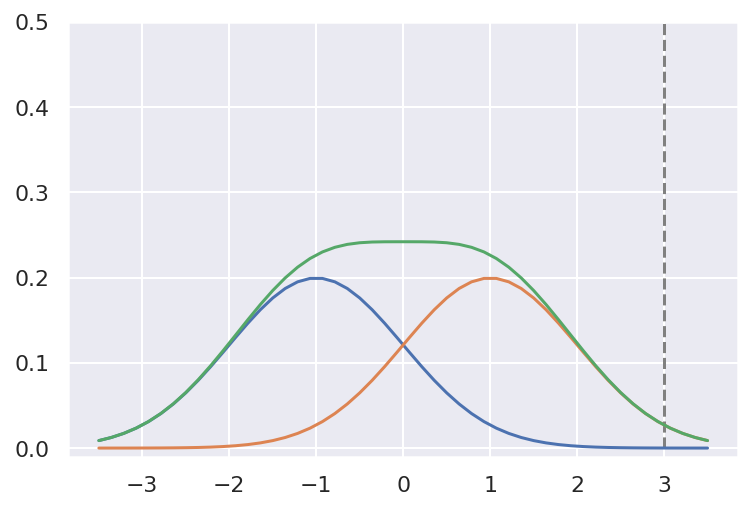

In [48]:
show_result(3,0.5)

TP:0.5000 FP:0.4886 
FN:0.0000 TN:0.0114 
正解率:		0.5114
Recall:		1.0000
Precision:	0.5057
F1 score:	0.6717


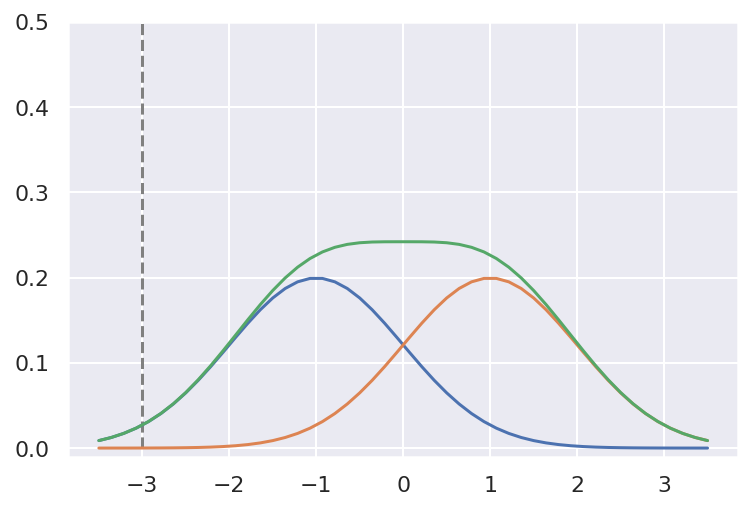

In [49]:
show_result(-3,0.5)

TP:0.0464 FP:0.0165 
FN:0.0536 TN:0.8835 
正解率:		0.9299
Recall:		0.4641
Precision:	0.7380
F1 score:	0.5699


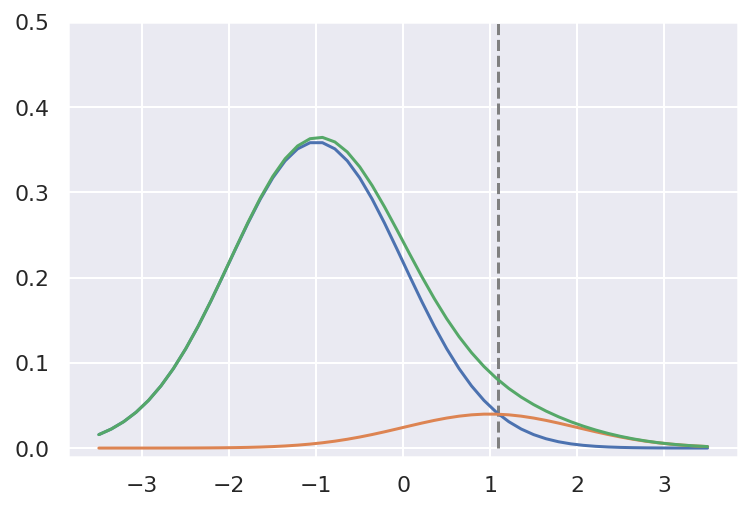

In [55]:
show_result(1.09,0.1)

TP:0.0010 FP:0.0005 
FN:0.0090 TN:0.9895 
正解率:		0.9905
Recall:		0.0968
Precision:	0.6692
F1 score:	0.1691


(-0.001, 0.01)

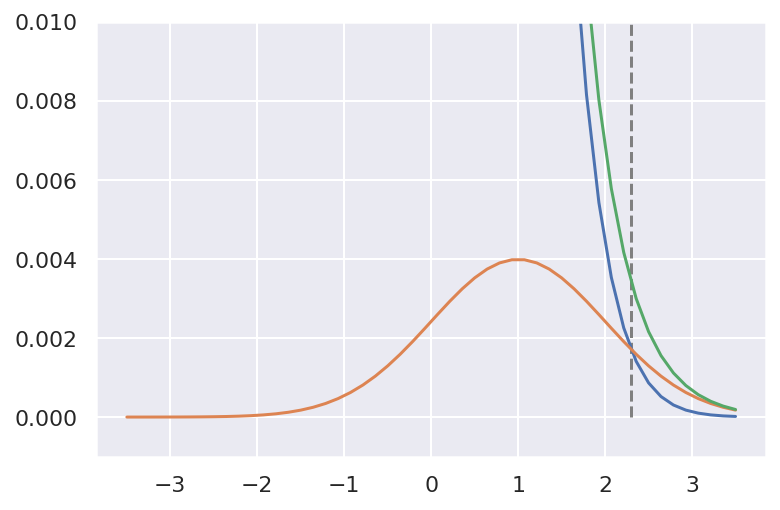

In [69]:
show_result(2.3,0.01)
plt.ylim(-0.001,0.01)

TP:0.0084 FP:0.1571 
FN:0.0016 TN:0.8329 
正解率:		0.8413
Recall:		0.8413
Precision:	0.0508
F1 score:	0.0959


(-0.001, 0.01)

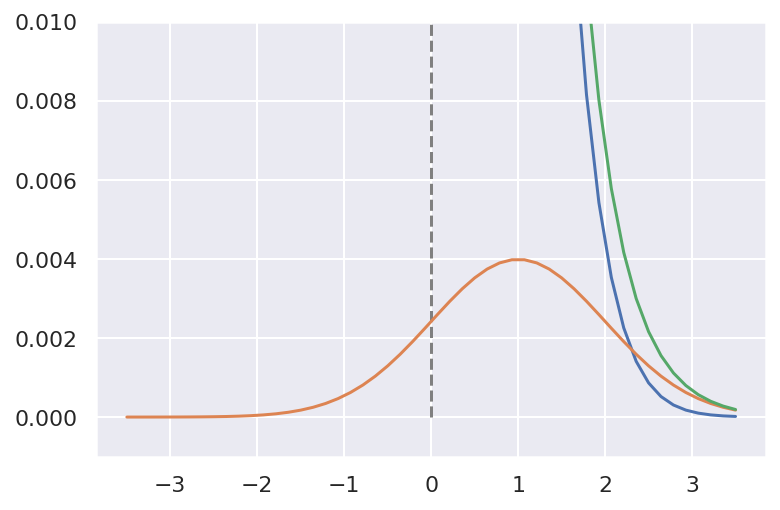

In [76]:
show_result(0,0.01)
plt.ylim(-0.001,0.01)

TP:0.0050 FP:0.0225 
FN:0.0050 TN:0.9675 
正解率:		0.9725
Recall:		0.5000
Precision:	0.1817
F1 score:	0.2665


(-0.001, 0.01)

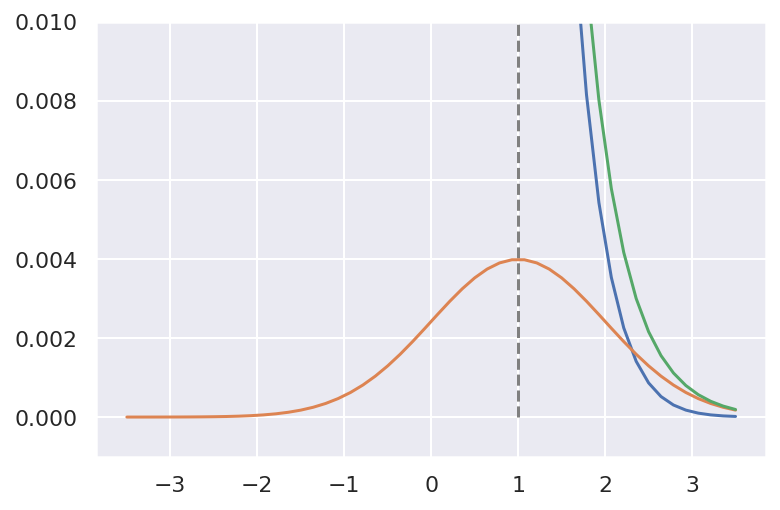

In [75]:
show_result(1,0.01)
plt.ylim(-0.001,0.01)

TP:0.0050 FP:0.0225 
FN:0.0050 TN:0.9675 
正解率:		0.9725
Recall:		0.5000
Precision:	0.1817
F1 score:	0.2665


(-0.001, 0.01)

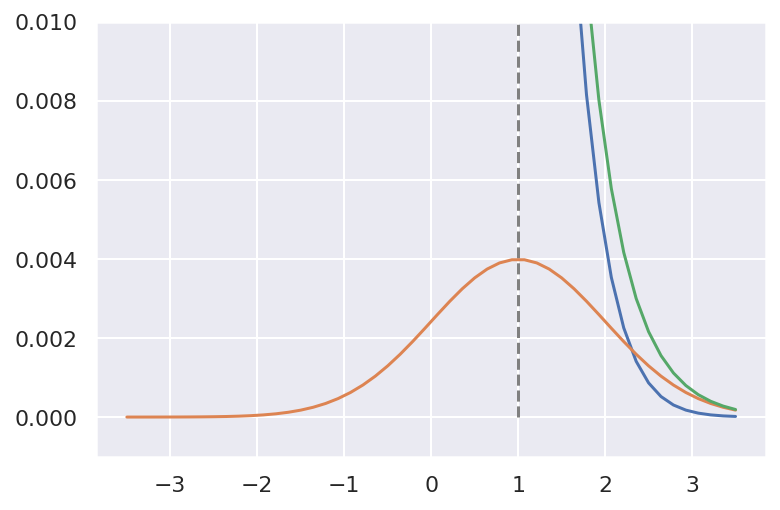

In [75]:
show_result(1,0.01)
plt.ylim(-0.001,0.01)